In [1]:
from LIMxCMBL.init import *
from scipy.integrate import simpson, trapezoid

In [2]:
# COMAP
zmin = 2.4
zmax = 3.4
line_str = 'CO'

Omega_field = 2.5 * (np.pi/180)**2 #rad^2
chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

In [3]:
from LIMxCMBL.experiments import *
_a, _b = COMAP_Pei()
print(_a, _b)
Pei = np.array(_a) # kJy2 Mpc3 / sr2
print(Pei)

52.84337535246153 kJy2 Mpc3 / sr2 64.99303792382938 kJy2 Mpc3 / sr2
52.84337535246153


In [4]:
n_bins = 100
chi_bin_edges = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), n_bins + 1)
chi_bin_centers = (chi_bin_edges[1:] + chi_bin_edges[:-1])/2
dchi_binned = np.mean(np.diff(chi_bin_edges))

In [5]:
import matplotlib.pyplot as plt

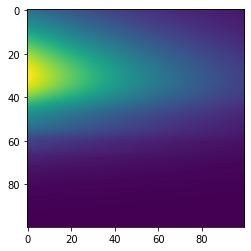

In [6]:
I_kappa_fname = '/scratch/users/delon/LIMxCMBL/IHiKappa/Ik_'
I_kappa_fname +='zmin_%.5f_zmax_%.5f_quad_next_%d.npy'%(zmin, 
                                                        zmax, 
                                                        1000)

I_kappa_unbinned = np.load(I_kappa_fname)

I_kappa = np.zeros((len(ells), n_bins))
external_chis = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), 1000)
for i, (l1, r1) in enumerate(zip(chi_bin_edges, chi_bin_edges[1:])):
            idx1 = np.where((external_chis > l1) & (external_chis <= r1))[0]
            I_kappa[:,i] = (np.sum(I_kappa_unbinned[:,idx1[0]:idx1[-1]+1,], 
                                 axis=(1)) / len(idx1))
            
plt.imshow(I_kappa)

In [7]:
print(np.max(np.abs(I_kappa)))

1.3274911410610771e-08


In [8]:
def get_binned(base, n_external = 300):
    external_chis = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), n_external)
    
    oup = np.zeros((100, n_bins, n_bins), dtype=np.float64)
    for i, (l1, r1) in enumerate(zip(chi_bin_edges, chi_bin_edges[1:])):
        for j, (l2, r2) in enumerate(zip(chi_bin_edges, chi_bin_edges[1:])):
            idx1 = np.where((external_chis > l1) & (external_chis <= r1))[0]
            idx2 = np.where((external_chis > l2) & (external_chis <= r2))[0]
            oup[:,i,j] = (np.sum(base[:,
                                      idx1[0]:idx1[-1]+1,
                                      idx2[0]:idx2[-1]+1], 
                                 axis=(1, 2)) / len(idx1) / len(idx2))
    return oup

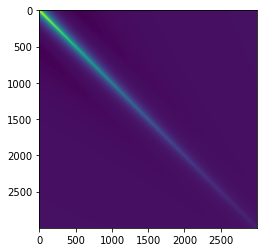

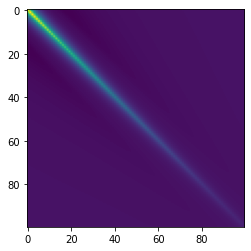

In [9]:
#get <II>

I_I_unbinned = np.load('/scratch/users/delon/LIMxCMBL/I_auto/'+
                          'I_auto_n_ext_%d_zmin_%.1f_zmax_%.1f.npy'%(3000, 
                                                                     zmin, 
                                                                     zmax))

plt.imshow(I_I_unbinned[0])
plt.show()
I_I = get_binned(I_I_unbinned, n_external = 3000)
plt.imshow(I_I[0])

In [11]:
from tqdm import trange

In [12]:

for Lambda_idx in range(24, 25):
    Lambda = Lambdas[Lambda_idx]

    cross = np.zeros((len(ells), n_bins, n_bins))
    auto = np.zeros((len(ells), n_bins, n_bins))

    for idx1 in trange(n_bins):
        for idx2 in range(idx1, n_bins):
            cross_fname = '/scratch/users/delon/LIMxCMBL/I_auto/2025-03-25-try2/cross_'
            cross_fname += '%s_zmin_%.1f_zmax_%.1f_Lambda_idx_%d_n_b_%d_%d_%d_jax_qmc.npy'%(line_str,
                                                                                            zmin, zmax, 
                                                                                            Lambda_idx, 
                                                                                            n_bins,idx1, idx2)
            cross_fname += 'relerr.npy'
            cross[:, idx1, idx2] = np.load(cross_fname)
            
            auto_fname = '/scratch/users/delon/LIMxCMBL/I_auto/lolo_'
            auto_fname += '%s_zmin_%.1f_zmax_%.1f_Lambda_idx_%d_n_b_%d_%d_%d_jax_qmc.npy'%(line_str,
                                                                                            zmin, zmax, 
                                                                                            Lambda_idx, 
                                                                                            n_bins,idx1, idx2)

            auto_fname += 'relerr.npy'
            auto[:, idx1, idx2] = np.load(auto_fname)


100%|██████████| 100/100 [00:04<00:00, 21.78it/s]


In [13]:
ells[50]

230.7364273173341

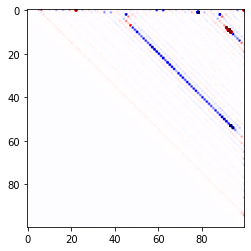

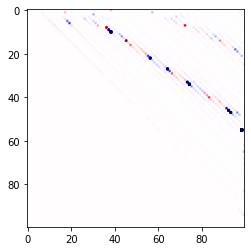

In [14]:
ell_idx = 53
plt.imshow((cross[ell_idx]),
          vmin = -0.01,
          vmax = 0.01,
          cmap = 'seismic')

plt.show()

plt.imshow((auto[ell_idx]),
          vmin = -0.1,
          vmax = 0.1,
          cmap = 'seismic')

plt.show()

In [15]:
max_index_flat = np.argmax(np.abs(cross)[ell_idx])
max_index_2d = np.unravel_index(max_index_flat, cross[ell_idx].shape)
print(max_index_2d)
print( np.max(np.abs(cross)[ell_idx]))

(9, 92)
4.259348109184547


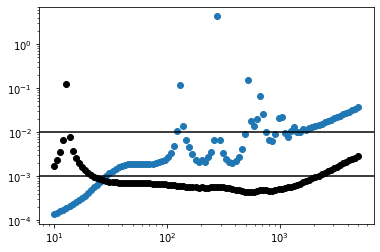

In [16]:
plt.scatter(ells, np.abs(cross[:,max_index_2d[0], max_index_2d[1]]))


asdf = np.load('/scratch/users/delon/LIMxCMBL/I_auto/comb_CO_zmin_2.4_zmax_3.4_Lambda_idx_24_n_b_100_%d_%d_jax_qmc.npyrelerr.npy'%(max_index_2d[0], max_index_2d[1]))
plt.scatter(ells, np.abs(asdf), c='k')

plt.axhline(1e-2, c='k')
plt.axhline(1e-3, c='k')

plt.yscale('log')
plt.xscale('log')

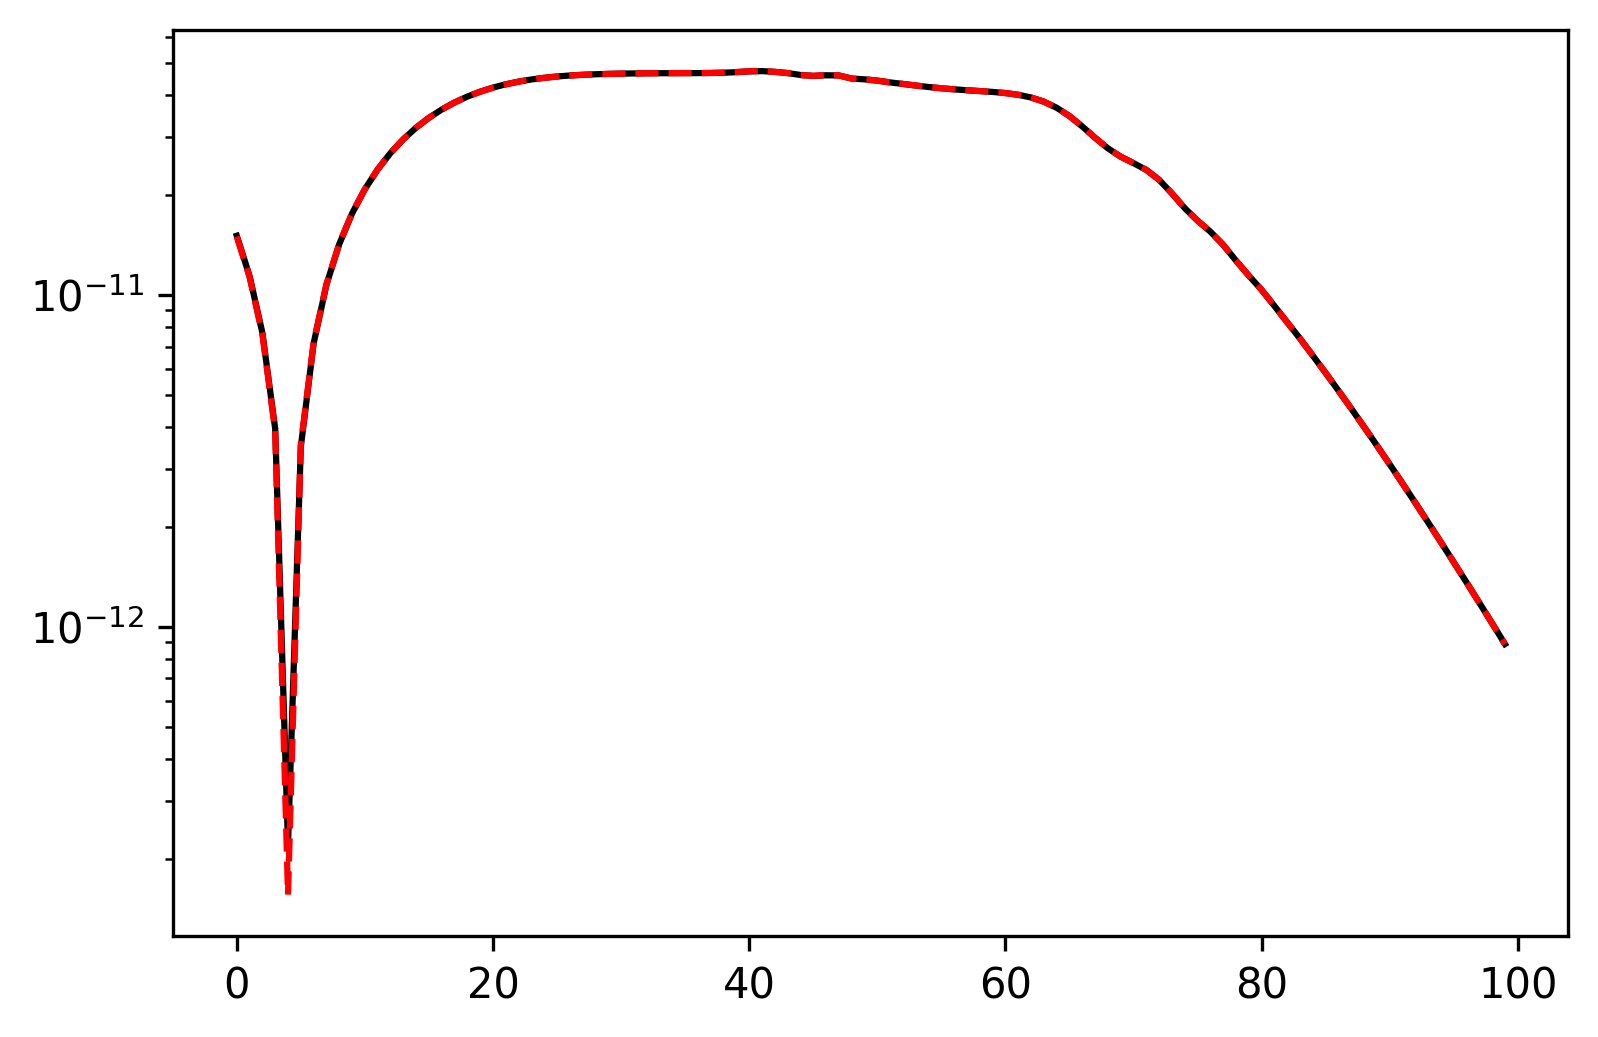

In [17]:
plt.figure(dpi = 300)
asdf = np.load('/scratch/users/delon/LIMxCMBL/I_auto/comb_CO_zmin_2.4_zmax_3.4_Lambda_idx_24_n_b_100_%d_%d_jax_qmc.npy'%(max_index_2d[0], max_index_2d[1]))
plt.plot(np.abs(asdf), 'k')
plt.yscale('log')


Lambda_idx = 24
Lambda = Lambdas[Lambda_idx]

idx1 = max_index_2d[0]
idx2 = max_index_2d[1]

cross_fname = '/scratch/users/delon/LIMxCMBL/I_auto/2025-03-25-try2/cross_'
cross_fname += '%s_zmin_%.1f_zmax_%.1f_Lambda_idx_%d_n_b_%d_%d_%d_jax_qmc.npy'%(line_str,
                                                                                zmin, zmax, 
                                                                                Lambda_idx, 
                                                                                n_bins,idx1, idx2)
_cross = np.load(cross_fname)

auto_fname = '/scratch/users/delon/LIMxCMBL/I_auto/lolo_'
auto_fname += '%s_zmin_%.1f_zmax_%.1f_Lambda_idx_%d_n_b_%d_%d_%d_jax_qmc.npy'%(line_str,
                                                                                zmin, zmax, 
                                                                                Lambda_idx, 
                                                                                n_bins,idx1, idx2)

_auto = np.load(auto_fname)


plt.plot(np.abs(I_I[:, idx1, idx2] + _auto - _cross), 'r--')




In [18]:
max_index_flat = np.argmax(np.abs(auto)[ell_idx])
max_index_2d = np.unravel_index(max_index_flat, auto[ell_idx].shape)
print(max_index_2d)
print( np.max(np.abs(auto)[ell_idx]))

(55, 98)
1.2606651162595641


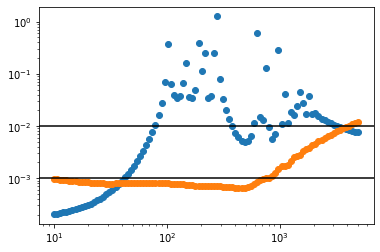

In [19]:
plt.scatter(ells, np.abs(auto[:,max_index_2d[0], max_index_2d[1]]))
plt.axhline(1e-3, c='k')
plt.axhline(1e-2, c='k')


asdf = np.load('/scratch/users/delon/LIMxCMBL/I_auto/comb_CO_zmin_2.4_zmax_3.4_Lambda_idx_24_n_b_100_%d_%d_jax_qmc.npyrelerr.npy'%(max_index_2d[0], max_index_2d[1]))
plt.scatter(ells, np.abs(asdf))

plt.yscale('log')
plt.xscale('log')

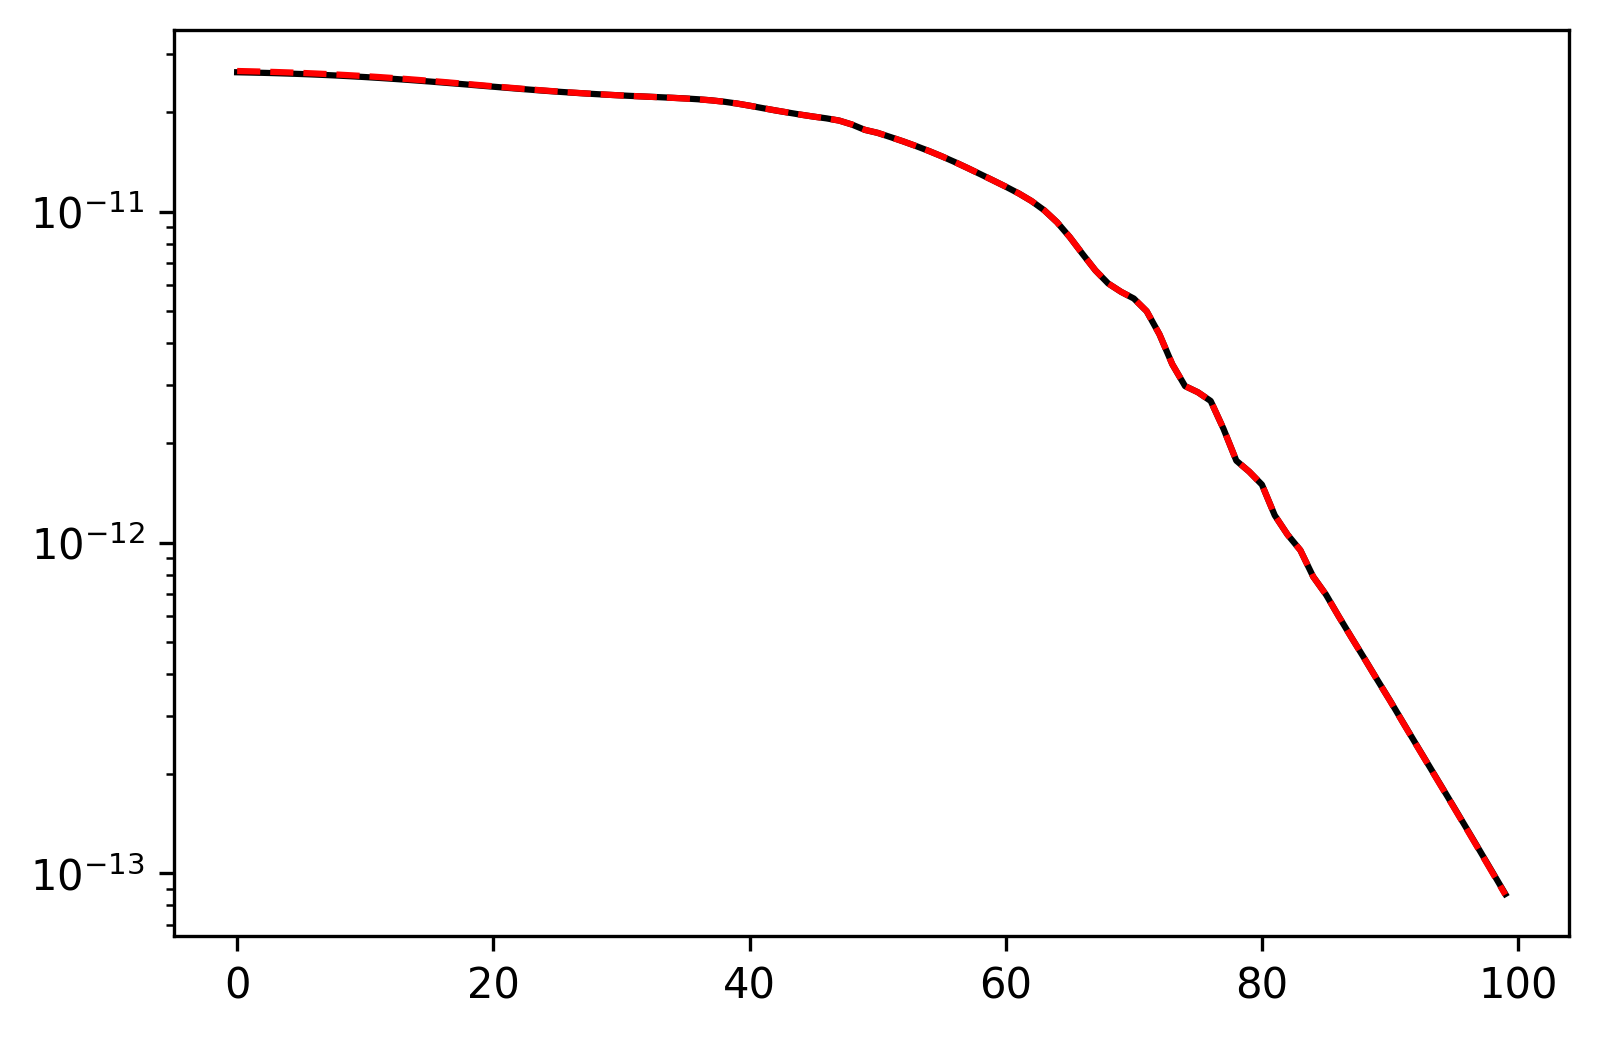

In [20]:
plt.figure(dpi = 300)
asdf = np.load('/scratch/users/delon/LIMxCMBL/I_auto/comb_CO_zmin_2.4_zmax_3.4_Lambda_idx_24_n_b_100_%d_%d_jax_qmc.npy'%(max_index_2d[0], max_index_2d[1]))
plt.plot(np.abs(asdf), 'k')
plt.yscale('log')


Lambda_idx = 24
Lambda = Lambdas[Lambda_idx]

idx1 = max_index_2d[0]
idx2 = max_index_2d[1]

cross_fname = '/scratch/users/delon/LIMxCMBL/I_auto/2025-03-25-try2/cross_'
cross_fname += '%s_zmin_%.1f_zmax_%.1f_Lambda_idx_%d_n_b_%d_%d_%d_jax_qmc.npy'%(line_str,
                                                                                zmin, zmax, 
                                                                                Lambda_idx, 
                                                                                n_bins,idx1, idx2)
_cross = np.load(cross_fname)

auto_fname = '/scratch/users/delon/LIMxCMBL/I_auto/lolo_'
auto_fname += '%s_zmin_%.1f_zmax_%.1f_Lambda_idx_%d_n_b_%d_%d_%d_jax_qmc.npy'%(line_str,
                                                                                zmin, zmax, 
                                                                                Lambda_idx, 
                                                                                n_bins,idx1, idx2)

_auto = np.load(auto_fname)


plt.plot(np.abs(I_I[:, idx1, idx2] + _auto - _cross), 'r--')

# plt.plot(np.abs(I_I[:, idx1, idx2]), 'gray', ls='--')

[0, 0]
1.2606651162595641


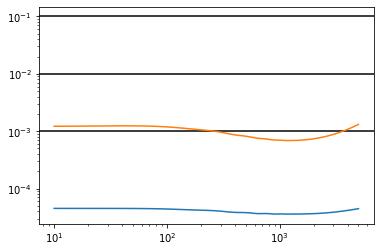

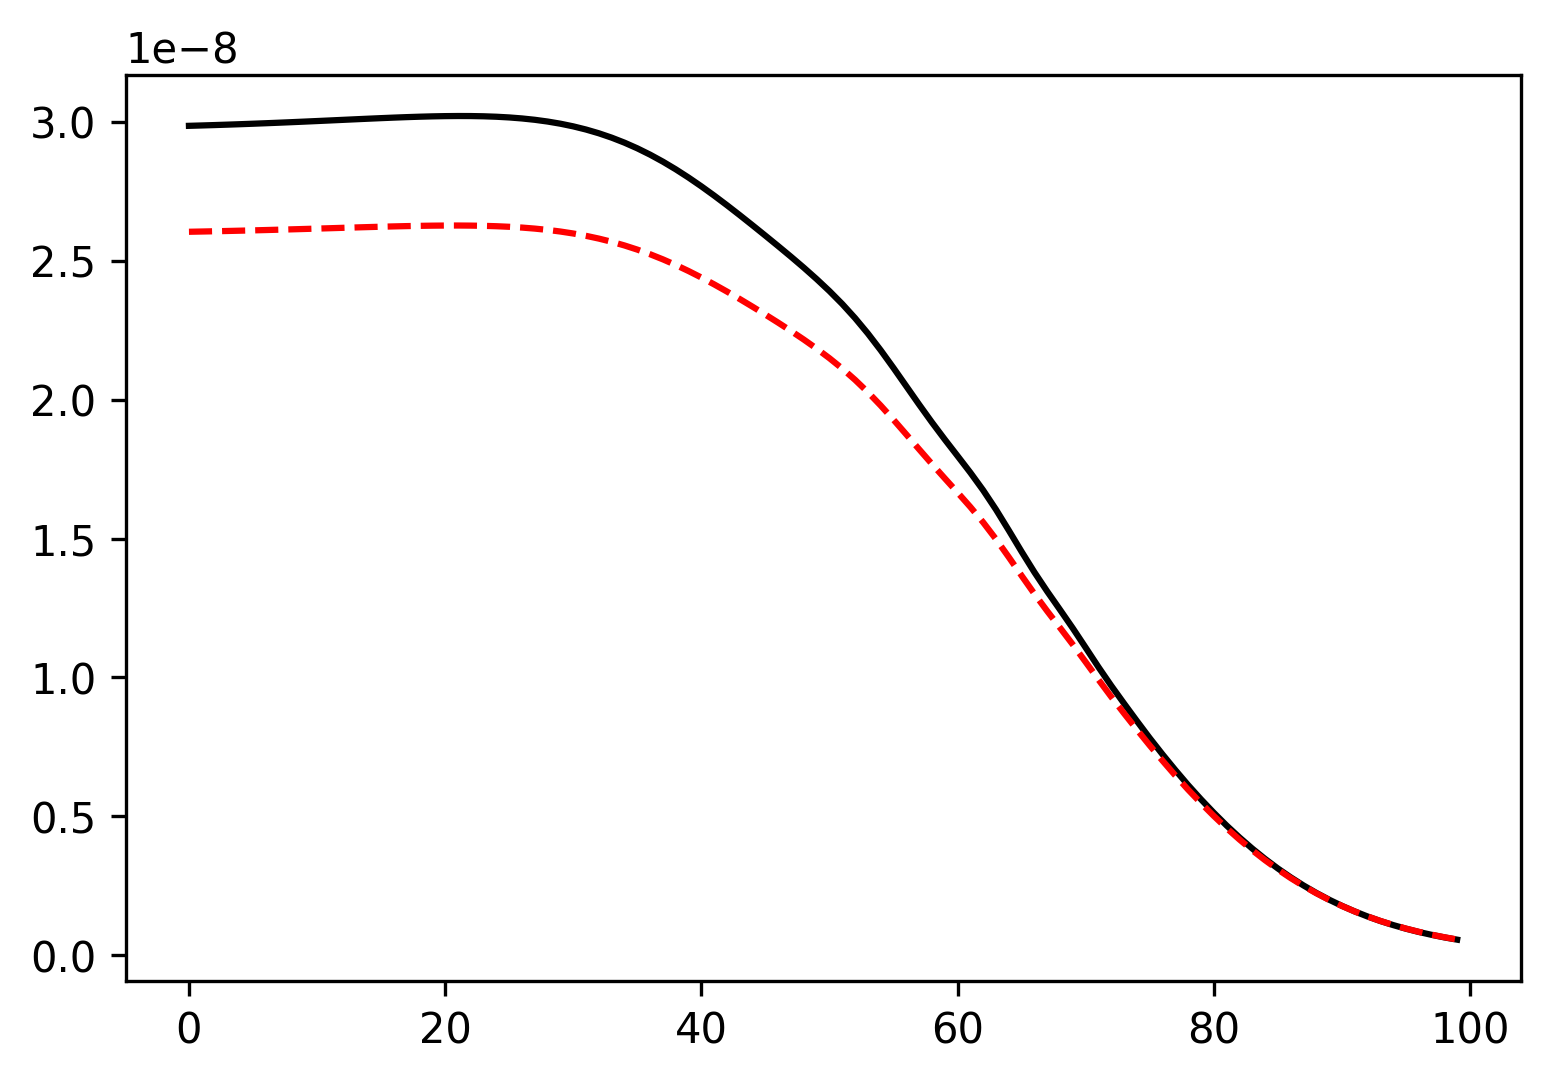

In [64]:
max_index_2d = [0, 0]

idx1 = max_index_2d[0]
idx2 = max_index_2d[1]

print(max_index_2d)
print( np.max(np.abs(auto)[ell_idx]))

plt.plot(ells, np.abs(auto[:,max_index_2d[0], max_index_2d[1]]))
plt.axhline(1e-3, c='k')
plt.axhline(1e-2, c='k')

plt.axhline(1e-1, c='k')

asdf = np.load('/scratch/users/delon/LIMxCMBL/I_auto/comb_CO_zmin_2.4_zmax_3.4_Lambda_idx_24_n_b_100_%d_%d_jax_qmc.npyrelerr.npy'%(max_index_2d[0], max_index_2d[1]))
plt.plot(ells, np.abs(asdf))

plt.yscale('log')
plt.xscale('log')
plt.show()



plt.figure(dpi = 300)
asdf = np.load('/scratch/users/delon/LIMxCMBL/I_auto/comb_CO_zmin_2.4_zmax_3.4_Lambda_idx_24_n_b_100_%d_%d_jax_qmc.npy'%(max_index_2d[0], max_index_2d[1]))
plt.plot(np.abs(asdf), 'k')
# plt.yscale('log')


Lambda_idx = 24
Lambda = Lambdas[Lambda_idx]

cross_fname = '/scratch/users/delon/LIMxCMBL/I_auto/2025-03-25-try2/cross_'
cross_fname += '%s_zmin_%.1f_zmax_%.1f_Lambda_idx_%d_n_b_%d_%d_%d_jax_qmc.npy'%(line_str,
                                                                                zmin, zmax, 
                                                                                Lambda_idx, 
                                                                                n_bins,idx1, idx2)
_cross = np.load(cross_fname)

auto_fname = '/scratch/users/delon/LIMxCMBL/I_auto/lolo_'
auto_fname += '%s_zmin_%.1f_zmax_%.1f_Lambda_idx_%d_n_b_%d_%d_%d_jax_qmc.npy'%(line_str,
                                                                                zmin, zmax, 
                                                                                Lambda_idx, 
                                                                                n_bins,idx1, idx2)

_auto = np.load(auto_fname)


plt.plot(np.abs(I_I[:, idx1, idx2] + _auto - _cross), 'r--')

# plt.plot(np.abs(I_I[:, idx1, idx2]), 'gray', ls='--')